Connor Poetzinger


# Random Number generator 

## Uniform Random Cordinates 

Generate 10,000 uniform random cordinates, store then in an array, and plot them.

Text(0.5, 0, 'X')

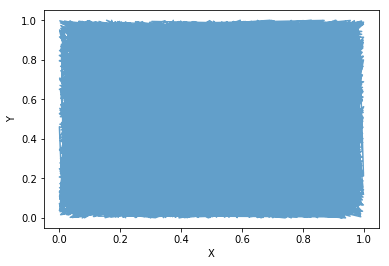

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

#initialize uniform random variables for x and y 
x = np.random.uniform(0, 1, 10000)
y = np.random.uniform(0, 1, 10000)

#plot random coordinates 
plt.plot(x, y, alpha = 0.7); plt.ylabel('Y'); plt.xlabel('X')

## Histogram Visuals 

Generate histograms of the random samples and show them in the same plot.

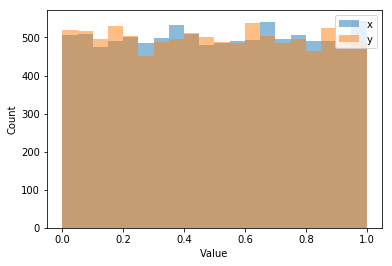

In [2]:
#plot histogram for x and y uniform random numbers 
plt.hist(x, 20, alpha = 0.5, label = 'x')
plt.hist(y, 20, alpha = 0.5, label = 'y')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend(loc='upper right')

## Randomness of Samples

Determine the randomness of the samples. Calculate the mean of x and y, and compare the results to the expected value of the two random variables which are both 0.5.

In [3]:
#Create expected value  
expected_value = 0.5 

#calculate the mean of x and y random uniform values 
x_mean = np.mean(x)
y_mean = np.mean(y)

#compare expected values with mean of x and y values 
comp_x = expected_value - x_mean
comp_y = expected_value - y_mean

#print results 
print('Mean of random sample x: {}\nMean of random sample y: {}'.format(x_mean,y_mean))

print('Expected value minus mean of random sample x: {}\nExpected value minus mean of random sample y: {}'.format(comp_x, comp_y))

Mean of random sample x: 0.5012426220950413
Mean of random sample y: 0.497738238021686
Expected value minus mean of random sample x: -0.0012426220950413347
Expected value minus mean of random sample y: 0.002261761978314014


In [4]:
def RMSE(arr):
    """
    Inputs:
        arr - array of random points with size Nx2
    Outputs:
        x_mean - mean of X column
        y_mean - mean of Y column 
        calc - the root mean squared error
    """
    #split the array my columns of x and y 
    x = arr[:, 0]
    y = arr[:, 1]
    
    #calculate the mean of x and y 
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    #calculate the mean squared error
    calc = np.sqrt((x_mean - 0.5)**2 + (y_mean - 0.5)**2)
    
    #return expected values 
    return x_mean, y_mean, calc

In [5]:
# output the mean of each columns of the array
# and the root-mean-squared-error 

#initialize S Using 5 just to show mean of columns and rmse
S = 5

#uniform array of size Sx2
array = np.random.uniform(size=(S, 2))

#call RMSE function
x_mean, y_mean, calc = RMSE(array)

#output results 
print("The mean of the first column is {}.\n\n The mean of the second column is: {}.\n\n The root-mean-squared-error is:\n {}".format(x_mean, y_mean, calc))
    

The mean of the first column is 0.555448219221686.

 The mean of the second column is: 0.280718828273788.

 The root-mean-squared-error is:
 0.22618297302952892


In [6]:
#initial vraiables 
#row size for array of Nx2
dat = []

#uniform random array of size Nx2
for N in range(10, 10000):
    
    #create uniform random array for each value of N
    arr = np.random.uniform(size=(N, 2))
    
    #call RMSE function and append values to python list
    x_mean, y_mean, rmse = RMSE(arr)
    dat.append(rmse)

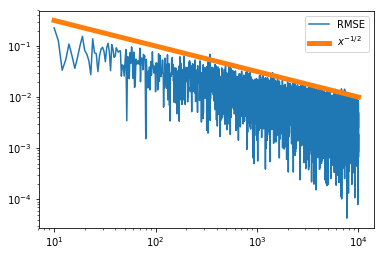

In [7]:
x = np.linspace(10, 10000, 9990)
plt.loglog(x, dat, label='RMSE')
plt.loglog(x, x**(-1/2), linewidth=5,label='$x^{-1/2}$')
plt.legend()

# Monty Hall Problem 

## List All Outcomes And Find Probabilities of Each Outcome

Assume the contestant picks door 1. Since there are 3 possible locations of the car and two choices (switch or keep), there are a total of 3*2 = 6 outcomes. List all six outcomes and determine the result for each of them. Calculate the pobability of winning the car for each of the  two strategies (switch or keep). 

In [8]:
data = {'Behind door 1':['Goat', 'Goat', 'Car'], 
        'Behind door 2':['Goat', 'Car', 'Goat'], 
        'Behind door 3':['Car', 'Goal', 'Goat'], 
        'Result if staying':['Wins goat', 'Wins goat', 'Wins car'], 
        'Result if switching':['Wins car', 'Wins car','Wins goat']}

In [9]:
df = pd.DataFrame(data)
df

,Behind door 1,Behind door 2,Behind door 3,Result if staying,Result if switching
0,Goat,Goat,Car,Wins goat,Wins car
1,Goat,Car,Goal,Wins goat,Wins car
2,Car,Goat,Goat,Wins car,Wins goat


The probability of winning the car if the contestant does not switch his/her initial choice is 1/3. The probability of winning the car if the contestant does switch his/her initial choice is 2/3. 

## Monty Hall Function

In [10]:
import random 

def montyHall(switch_door, n_doors):
    """
    This function simulates the monty hall game. Contestant chooses door at random 
    in hopes that his selected door reveals a prize. The host then picks a different 
    door to show the contestant that the door does not contain the prize. The 
    contestant then has the choice to switch his door to the last remaining door 
    or stick with his selection. 
    Input:
        switch_door - Boolean value to determine if the candidate switces doors
        n_doors - number of doors to be open in a game 
    Output:
        result - boolean value that determines if the candidate won or lost. True 
        for won, False for lost
    """
    
    #randomly chosen int 1, 2, or 3 to represent door with car and 
    #contestant's choice
    car_door = random.randint(1, n_doors)
    contestant_door = random.randint(1, n_doors)
    
    #This creates a list of doors [1, 2, 3]
    doors = list(range(1, n_doors+1))#must do n_doors+1 since range is exclusive at 
                                     #the end point 
    
    #continue to loop through the list of doors [1,2,3] until the host picks a door 
    #that hasn't been selected yet
    while len(doors) > 2:
        
        #randomly chose a door to open 
        #going to use choice function in the random package to "open" door 
        host_door = random.choice(doors)#makes a random selection in doors [1,2,3] 
        
        #the host can never open the door with the car or the door that the 
        #contestant chose 
        if ((host_door == car_door) or (host_door == contestant_door)):
            #continue within the while loop until the host picks a door that isnt the 
            #car or contestant door
            continue
            
        #host picks a door, remove the door from the list of remaining_doors 
        doors.remove(host_door)#remove the host door from the list of doors 
    
    #If the contestant switches their choice 
    if switch_door:#if the boolean value == True 
        
        #there are two doors left. The contestant will never choose the same door, 
        #so I remove that door as a choice. Make remaining_doors into list so you 
        #can remove contestant_door 
        #remember here the door only has the contestant door and the car door 
        available_doors = list(doors)
        available_doors.remove(contestant_door)#remove contestants initial choice 
        
        #change the candidate_door to the only door available 
        #pop returns the only value in the list as original datatype element
        contestant_door = available_doors.pop() 
        
    #create boolean that labels if the candidate won or lost
    result = (contestant_door == car_door)
    
    #return boolean true or false 
    return result

In [11]:
def run_N_montyHall(N, switch_door, n_doors): 
    """
    This function runs the monty hall problem for N number of times 
    Input:
        N - Number of tests to run 
        switch_door - Boolean value to determine if the candidate switces doors
        n_doors - number of doors to be open in a game 
    Output:
        num_wins - Number of times the contestant won 
        
    """
    
    #num_wins is the counter. Intialize to 0
    num_wins = 0
    
    #run tests N times 
    for i in range(N):
        
        #if montyHall returns true increment win column 
        if montyHall(switch_door, n_doors):
            #update number of wins
            num_wins += 1
    
    #return the number of wins 
    return num_wins

In [12]:
#assign initial conditions
num_door = 3
num_test = 1000

#run tests without and with switch 
num_wins_without_switch = run_N_montyHall(num_test, False, num_door)
num_wins_with_switch = run_N_montyHall(num_test, True, num_door)

#calculate probability 
prob_without_switch = num_wins_without_switch/num_test
prob_with_switch = num_wins_with_switch/num_test

# #report outputs
data = {"Number of iterations":[num_test,num_test],
        "Number of doors":[num_door,num_door],
        "Number of wins":[num_wins_without_switch, num_wins_with_switch],
        "Percentage (%)":[prob_without_switch*100, prob_with_switch*100]}
df = pd.DataFrame(data, index=['Without Switching', 'With Switching'])
df

,Number of iterations,Number of doors,Number of wins,Percentage (%)
Without Switching,1000,3,345,34.5
With Switching,1000,3,672,67.2


## Generalize Monty Hall Function

In [13]:
#assign initial conditions
#For part three generalize code to simulate when there are 100 doors
num_door = 100
num_test = 10000

#run tests without and with switch 
num_wins_without_switch = run_N_montyHall(num_test, False, num_door)
num_wins_with_switch = run_N_montyHall(num_test, True, num_door)

#calculate probability 
prob_without_switch = num_wins_without_switch/num_test
prob_with_switch = num_wins_with_switch/num_test

# #report outputs
data = {"Number of iterations":[num_test,num_test],
        "Number of doors":[num_door,num_door],
        "Number of wins":[num_wins_without_switch, num_wins_with_switch],
        "Percentage (%)":[prob_without_switch*100, prob_with_switch*100]}
df = pd.DataFrame(data, index=['Without Switching', 'With Switching'])
df

,Number of iterations,Number of doors,Number of wins,Percentage (%)
Without Switching,10000,100,100,1.0
With Switching,10000,100,9880,98.8
